In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
import matplotlib
from os.path import dirname, join as pjoin
import scipy.io as sio

import seaborn as sns
import matplotlib.pyplot as plt


data_dir = pjoin(dirname(sio.__file__), 'matlab', 'tests', 'data')
X = sio.loadmat("ex7data2.mat")

X = X["X"]


# We will code K-means and check its performance against sklearn.kmeans 

# How K-means works?

1. First it takes some random k-cluster centroids prefeberaly from the given set. E.g. If i want to have three clusters it will take three training examples (here rows). And initialise them as k-centroids. 
2. Then it will iterate through the dataset and calculate the least_squares_distance for each training example for each initialised k_-centroids and will asign the training example to the k-centroid with least least_squares_distance value. 
3. Now We have each example (row). Assigned to one of the k-centroids. 
4. Now we will take the average value of all the training example of the same cluster and assign that average value as the new value for that k-centroid.
5. We will calculate the cost function which is the sum of least square distances from step 2. 
5. Now we will repeat from step 2 with the new averageed k-centroid values

In [21]:
def random_init(X,no_of_clusters):
    K = X[np.random.randint(X.shape[0], size=no_of_clusters), :]
    return K
    

In [22]:
def K_nearest_assignment(X,K):
    #K = random_init(X,no_of_clusters)
    Cx = np.zeros((X.shape[0],1))
    K_Centroids_Values = np.zeros((X.shape[0],1))
    for a in range(X.shape[0]):
        for i in range(K.shape[0]):
            temp_cent_value = sum((X[a,:] - K[i,:])**2)  
            if i == 0:
                K_Centroids_Values[a] =  temp_cent_value
                Cx[a] = i 
            if temp_cent_value < K_Centroids_Values[a]:
                K_Centroids_Values[a] =  temp_cent_value
                Cx[a] = i
    J = sum(K_Centroids_Values)/X.shape[0]
    K_Centroids_Values
    return Cx,J,K_Centroids_Values
            
                

In [23]:
def k_assigned_means(X,no_of_clusters,Cx):
    dx = np.c_[X,Cx]
    dx = pd.DataFrame(dx)
    k_means = np.zeros((no_of_clusters,X.shape[1]))
    #int_cx = np.unique(Cx)
    for i in np.unique(Cx).astype(int):
        temp_set = dx[dx.iloc[:,-1]==i]
        k_means[i,:] = np.reshape(((np.sum(temp_set,0).values[:-1])/temp_set.shape[0]),(1,X.shape[1]))
    return k_means
        
    
    

In [24]:
def K_means(X,no_of_clusters,no_of_iterations):
    K = random_init(X,no_of_clusters)
    J = np.zeros((no_of_iterations,1))
    Cx = np.zeros((X.shape[0],no_of_iterations))
    k_assign = np.zeros((no_of_iterations,no_of_clusters,X.shape[1]))
    for i in range(no_of_iterations):
        cx, J[i], K_values_j = K_nearest_assignment(X,K)
        Cx[:,i] = cx.flatten()
        K = k_assigned_means(X,no_of_clusters,cx) #[:,i]
        k_assign[i] = k_assigned_means(X,no_of_clusters,cx) #[:,i]
        
        
    return Cx[:,-1]
        
    
    

<AxesSubplot:>

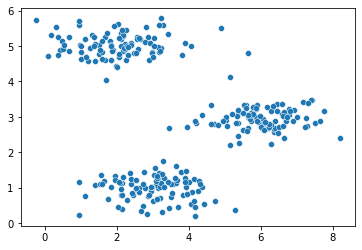

In [25]:
sns.scatterplot(x=X[:,0],y =X[:,1])

# This is how the data looks like

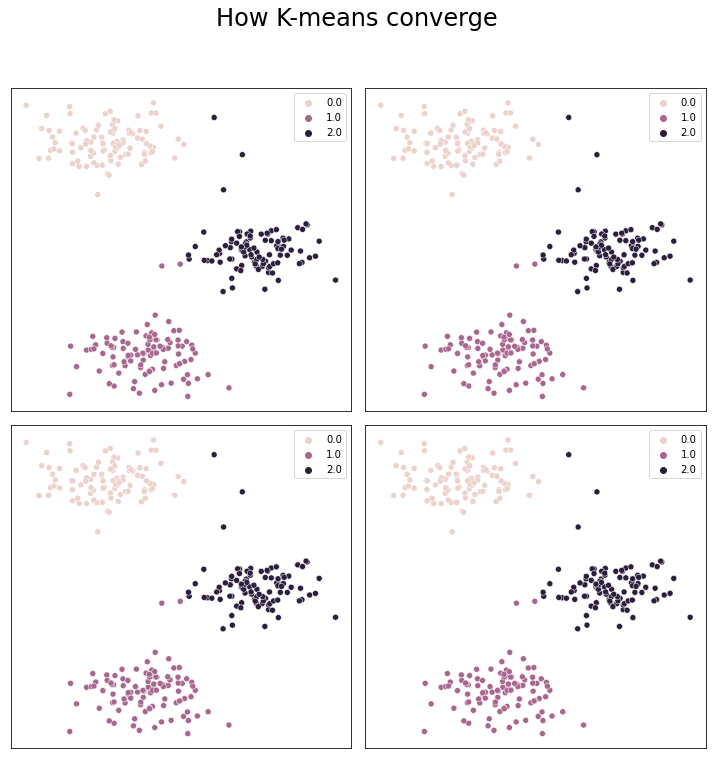

In [26]:
# After running our K-means with four random initialisation to make sure it does not get stuck in local optima

labels = K_means(X,3,20) 

rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(10,10))
fig.suptitle("How K-means converge", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
for i in range(rows):
  for j in range(cols):
    sns.scatterplot(ax =ax[i][j], x=X[:,0],y =X[:,1],hue=labels)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

# Looks great

# Now lets use sklearn. 

In [27]:
from sklearn.cluster import KMeans

<AxesSubplot:>

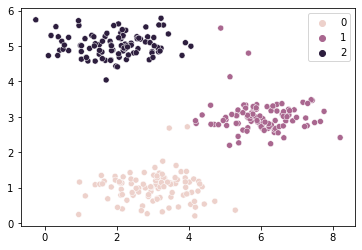

In [28]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x=X[:,0],y =X[:,1],hue=kmeans.labels_)

# Same results!!!!!!   Hope you like it.!!!! Upvote if you like!!!!!! Cheeers!!!!!!!